In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,NaN,70.0,4.0,NaN,322.0,NaN,2,109.0,NaN,NaN,NaN,3.0,3.0
1,0.0,67.0,3.0,115.0,564.0,0.0,2,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2.0,124.0,261.0,0.0,0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4.0,NaN,263.0,0.0,0,NaN,NaN,0.2,NaN,NaN,NaN
4,0.0,74.0,2.0,120.0,269.0,0.0,2,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,NaN,52.0,3.0,NaN,199.0,NaN,0,162.0,NaN,NaN,NaN,0.0,7.0
266,1.0,44.0,2.0,120.0,263.0,0.0,0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,2,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,140.0,192.0,0.0,0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	30
float64		column 2	14
float64		column 3	42
float64		column 4	58
float64		column 5	42
float64		column 6	30
int64		column 7	0
float64		column 8	70
float64		column 9	86
float64		column 10	58
float64		column 11	100
float64		column 12	70
float64		column 13	84


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,240.000000,256.000000,228.000000,212.000000,228.000000,240.000000,270.000000,200.000000,184.000000,212.000000,170.000000,200.000000,186.000000
mean,0.691667,54.562500,3.153509,130.617925,249.938596,0.141667,1.022222,150.345000,0.331522,1.105189,1.547059,0.695000,4.612903
std,0.462770,9.118608,0.956377,16.953247,53.527100,0.349437,0.997891,22.483628,0.472045,1.170296,0.606296,0.962605,1.934228
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,213.750000,0.000000,0.000000,138.750000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.850000,1.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,278.250000,0.000000,2.000000,166.000000,1.000000,1.800000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,180.000000,564.000000,1.000000,2.000000,195.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

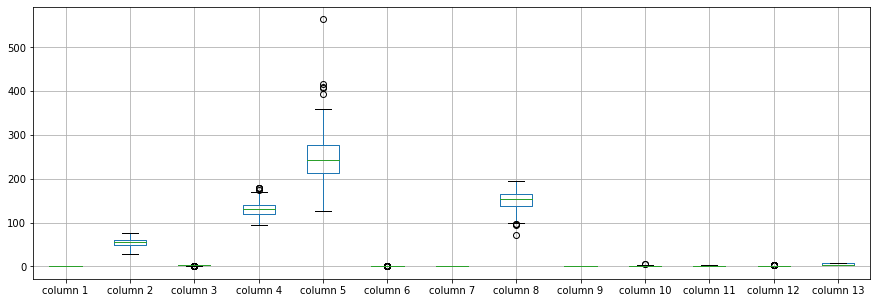

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.691667
column 2      54.562500
column 3       3.153509
column 4     130.617925
column 5     249.938596
column 6       0.141667
column 7       1.022222
column 8     150.345000
column 9       0.331522
column 10      1.105189
column 11      1.547059
column 12      0.695000
column 13      4.612903
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.080462,0.044516,-0.008757,-0.192429,0.036440,0.054931,-0.091187,0.145086,0.135201,0.118580,0.054531,0.387693
column 2,-0.080462,1.000000,0.124486,0.291861,0.213499,0.127738,0.121791,-0.389083,0.099809,0.158683,0.104317,0.306193,0.057433
column 3,0.044516,0.124486,1.000000,-0.045756,0.123210,-0.069949,0.039115,-0.336694,0.324849,0.170662,0.211294,0.204884,0.250838
column 4,-0.008757,0.291861,-0.045756,1.000000,0.078148,0.083457,0.087805,-0.045046,0.094695,0.213634,0.091149,0.066746,0.070364
column 5,-0.192429,0.213499,0.123210,0.078148,1.000000,0.035505,0.157090,0.021725,0.135066,0.006842,-0.014623,0.083674,0.000236
column 6,0.036440,0.127738,-0.069949,0.083457,0.035505,1.000000,0.092595,0.079110,0.012609,-0.027438,-0.030014,0.088177,-0.039353
column 7,0.054931,0.121791,0.039115,0.087805,0.157090,0.092595,1.000000,-0.124250,0.080981,0.085207,0.139065,0.048390,-0.044070
column 8,-0.091187,-0.389083,-0.336694,-0.045046,0.021725,0.079110,-0.124250,1.000000,-0.335043,-0.337606,-0.319734,-0.273911,-0.156915
column 9,0.145086,0.099809,0.324849,0.094695,0.135066,0.012609,0.080981,-0.335043,1.000000,0.201645,0.204467,0.121806,0.263712
column 10,0.135201,0.158683,0.170662,0.213634,0.006842,-0.027438,0.085207,-0.337606,0.201645,1.000000,0.563509,0.260480,0.386727


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+19,13+19+19,13+19+19+19,13+19+19+19+19,13+19+19+19+19+19,13+19+19+19+19,13+19+19+19,13+19+19,13+19,13], vae_layer = False, seed = 19)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 497.5659008026123
Epoch: 1 , loss: 496.71686363220215
Epoch: 2 , loss: 497.4886169433594
Epoch: 3 , loss: 490.09535217285156
Epoch: 4 , loss: 496.445951461792
Epoch: 5 , loss: 498.7618217468262
Epoch: 6 , loss: 497.44835472106934
Epoch: 7 , loss: 497.9254035949707
Epoch: 8 , loss: 497.6089382171631
Epoch: 9 , loss: 492.54432487487793
Epoch: 10 , loss: 490.2348327636719
Epoch: 11 , loss: 498.2001132965088
Epoch: 12 , loss: 497.88012313842773
Epoch: 13 , loss: 498.73258209228516
Epoch: 14 , loss: 493.33475494384766
Epoch: 15 , loss: 496.5670623779297
Epoch: 16 , loss: 493.6852684020996
Epoch: 17 , loss: 493.04999923706055
Epoch: 18 , loss: 493.73876571655273
Epoch: 19 , loss: 495.33654594421387
Epoch: 20 , loss: 494.55224418640137
Epoch: 21 , loss: 492.5614490509033
Epoch: 22 , loss: 494.31884574890137
Epoch: 23 , loss: 497.8495349884033
Epoch: 24 , loss: 496.4658432006836
Epoch: 25 , loss: 493.656581878

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,-0.610430,0.0,0.0,-126.182031,0.0,0.061401,0,0.000000,0.197927,-1.987289,-1.466528,0.0000,0.000000
1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
3,0.000000,0.0,0.0,-122.127346,0.0,0.000000,0,-98.873308,-0.795666,0.000000,-1.445384,-0.7087,-6.059193
4,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.576059,0.0,0.0,-167.786328,0.0,-0.924432,0,0.000000,0.227225,-0.046057,-0.418357,0.0000,0.000000
266,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
267,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
268,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2260.559054911666, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.4174815192146431

In [18]:
new_df.iloc[66,:]

column 1       1.000000
column 2      51.000000
column 3       4.000000
column 4       2.010566
column 5     261.000000
column 6       0.000000
column 7       2.000000
column 8       2.095063
column 9       0.110032
column 10      0.000000
column 11      0.278490
column 12      0.154917
column 13      0.405266
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.389570,70.0,4.0,3.817969,322.0,0.061401,2,109.000000,0.197927,0.412711,0.533472,3.0000,3.000000
1,0.000000,67.0,3.0,115.000000,564.0,0.000000,2,160.000000,0.000000,1.600000,2.000000,0.0000,7.000000
2,1.000000,57.0,2.0,124.000000,261.0,0.000000,0,141.000000,0.000000,0.300000,1.000000,0.0000,7.000000
3,1.000000,64.0,4.0,5.872654,263.0,0.000000,0,6.126692,0.204334,0.200000,0.554616,0.2913,0.940807
4,0.000000,74.0,2.0,120.000000,269.0,0.000000,2,121.000000,1.000000,0.200000,1.000000,1.0000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.423941,52.0,3.0,4.213672,199.0,0.075568,0,162.000000,0.227225,0.453943,0.581643,0.0000,7.000000
266,1.000000,44.0,2.0,120.000000,263.0,0.000000,0,173.000000,0.000000,0.000000,1.000000,0.0000,7.000000
267,0.000000,56.0,2.0,140.000000,294.0,0.000000,2,153.000000,0.000000,1.300000,2.000000,0.0000,3.000000
268,1.000000,57.0,4.0,140.000000,192.0,0.000000,0,148.000000,0.000000,0.400000,2.000000,0.0000,6.000000


In [20]:
imputations[-1].to_excel("Sheart_AE_20(imp).xlsx", index=False, header=False)